In [2]:
import pandas as pd
a = pd.read_csv('NationalNames.csv')

def task1():
    return a.head(8)
task1()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [2]:
def task2():
    return a.tail(8)
task2()

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [11]:
def task3():
    return a.columns
task3()

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [9]:
def task5():
    return a['Name'].nunique()
task5()

93889

In [5]:
def task10():
    return a.groupby('Year')['Name'].nunique()
task10()

Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64

In [16]:
def task11():
    year_with_most_unique_names = task10().idxmax()
    max_unique_names = task10().max()
    return int(year_with_most_unique_names), int(max_unique_names)
task11()
    

(2008, 32488)

In [28]:
def task12():
    return a[a['Year'] == 2008].groupby('Name')['Count'].sum().idxmax()
task12()

'Jacob'

In [57]:
def task13():
    return a[(a['Name'] == 'Jacob') & (a['Gender'] == 'F') & (b['Count'] == b['Count'].max())]
task13()

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


In [19]:
def task14():
    grouped_data = a.groupby(['Year', 'Name'])['Gender'].nunique().reset_index()
    neutral_names = grouped_data[grouped_data['Gender'] == 2]
    year_neutral_names_count = neutral_names.groupby('Year').size().reset_index(name='Gender_neutral_names')
    max_neutral_names_year = year_neutral_names_count[year_neutral_names_count['Gender_neutral_names'] == year_neutral_names_count['Gender_neutral_names'].max()]
    return max_neutral_names_year
task14()

,Year,Gender_neutral_names
128,2008,2557


In [20]:
def task15():
    b = a.groupby('Year')['Count'].sum()
    return b
task15()

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

In [27]:
def task16():
    year_grouped_data = a.groupby('Year').size().reset_index(name='Count')
    year_max_count = year_grouped_data.loc[year_grouped_data['Count'].idxmax(), 'Year']
    return int(year_with_max_count)
task16()


2008

In [22]:
def task17():
    return a.groupby(['Year', 'Gender'])['Count'].sum().unstack()
task17()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


In [32]:
def task18():
    return int((a.groupby(['Year', 'Gender'])['Count'].sum().unstack()['F'] > a.groupby(['Year', 'Gender'])['Count'].sum().unstack()['M']).sum())
task18()

54

In [37]:
def task21():
    return int(a[(a['Name'] == 'Barbara') & (a['Gender'] == 'M')]['Count'].sum())
task21()

4139

In [38]:
def task22():
    return a['Year'].nunique()
task22()

135

In [47]:
def task23():
    group = a.groupby(['Name', 'Year'])['Gender'].nunique().reset_index()
    gender_neutral = group[group['Gender'] == 2]
    year_count = gender_neutral.groupby('Name')['Year'].nunique().reset_index()
    total_years = a['Year'].nunique()
    names = year_count[year_count['Year'] == total_years]
    names = names[['Name']].reset_index(drop=True)
    return names

task23()

,Name
0,Francis
1,James
2,Jean
3,Jesse
4,Jessie
5,John
6,Johnnie
7,Joseph
8,Lee
9,Leslie


In [48]:
def task24():
    name_counts = a.groupby('Name').size().reset_index(name='Total_Count')
    min_count = name_counts['Total_Count'].min()
    unpopular_names = name_counts[name_counts['Total_Count'] == min_count]
    most_popular_unpopular = unpopular_names.loc[unpopular_names['Total_Count'].idxmax()]
    
    result = f"Наиболее популярное из непопулярных имен - это {most_popular_unpopular['Name']}. Им называли {most_popular_unpopular['Total_Count']} раз"
    return result

task24()

'Наиболее популярное из непопулярных имен - это Aabid. Им называли 1 раз'

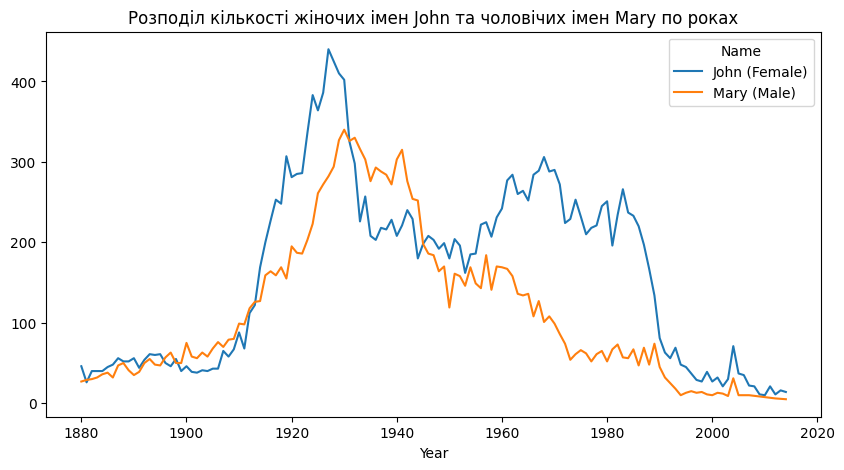

In [3]:
import matplotlib.pyplot as plt

def task26():
    john_female = a[(a['Name'] == 'John') & (a['Gender'] == 'F')]
    mary_male = a[(a['Name'] == 'Mary') & (a['Gender'] == 'M')]

    john_female_counts = john_female.groupby('Year')['Count'].sum()
    mary_male_counts = mary_male.groupby('Year')['Count'].sum()

    plt.figure(figsize=(10, 5))
    plt.plot(john_female_counts.index, john_female_counts.values, label='John (Female)')
    plt.plot(mary_male_counts.index, mary_male_counts.values, label='Mary (Male)')

    plt.title('Розподіл кількості жіночих імен John та чоловічих імен Mary по роках')
    plt.xlabel('Year')
    plt.legend(title='Name')
    plt.show()
task26()